<a href="https://colab.research.google.com/github/DharmendraYadav96/Resume-Screening-App/blob/main/Resume_Screening_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resume Screening App**


### Project Summary


Developed a **Resume Screening App** to automatically identify job roles based on textual data from resumes. The project involved extensive **Exploratory Data Analysis (EDA)** to understand the structure and distribution of the data. To prepare the text for machine learning, pre-processing steps such as removing punctuations, hashtags, links, and other unwanted elements were applied. **TF-IDF (Term Frequency-Inverse Document Frequency)** was used for text vectorization to transform the textual data into numerical features. A **multiclass classification** machine learning algorithm was then applied to train the model on the cleaned data. Finally, the model was deployed using **Streamlit** to provide an interactive and user-friendly web application for screening resumes and predicting the most relevant job role.

## **1. Know your dataset**

#### Importing libraries


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import nltk
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

import pickle

#### Dataset loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/Dataset/UpdatedResumeDataSet.csv'
df = pd.read_csv(path)

In [4]:
df.head()

Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

#### Check null values

In [5]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

#### Exploring Categories

In [6]:
print(df['Category'].unique())
print("No. of unique values", df['Category'].nunique())
df['Category'].value_counts()

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
No. of unique values 25


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

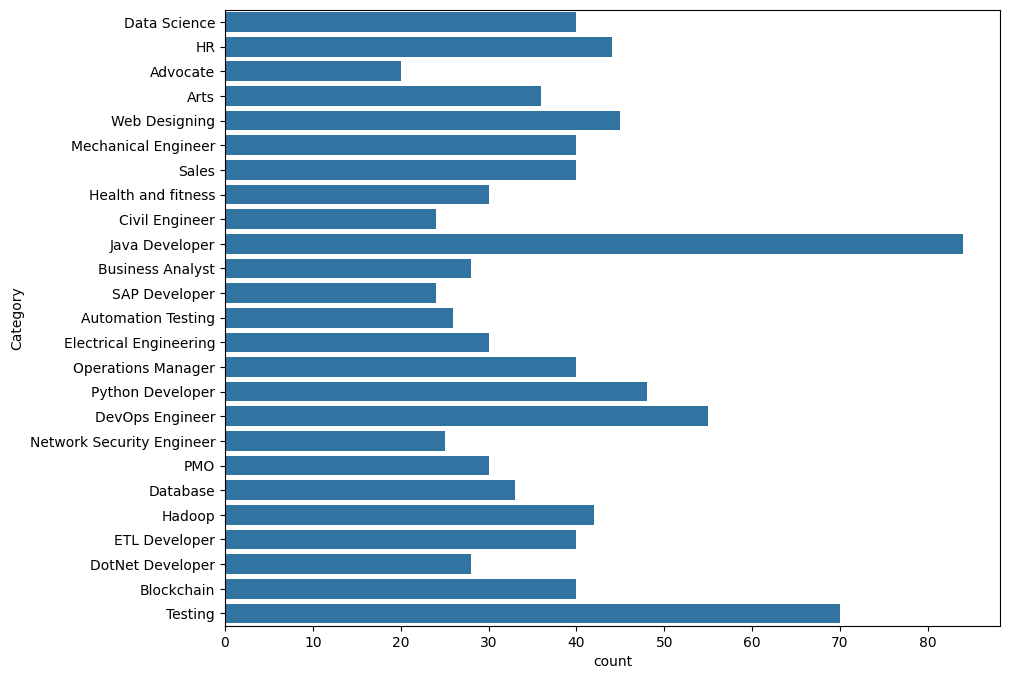

In [7]:
plt.figure(figsize=(10,8))
sns.countplot(df['Category'])
plt.show()

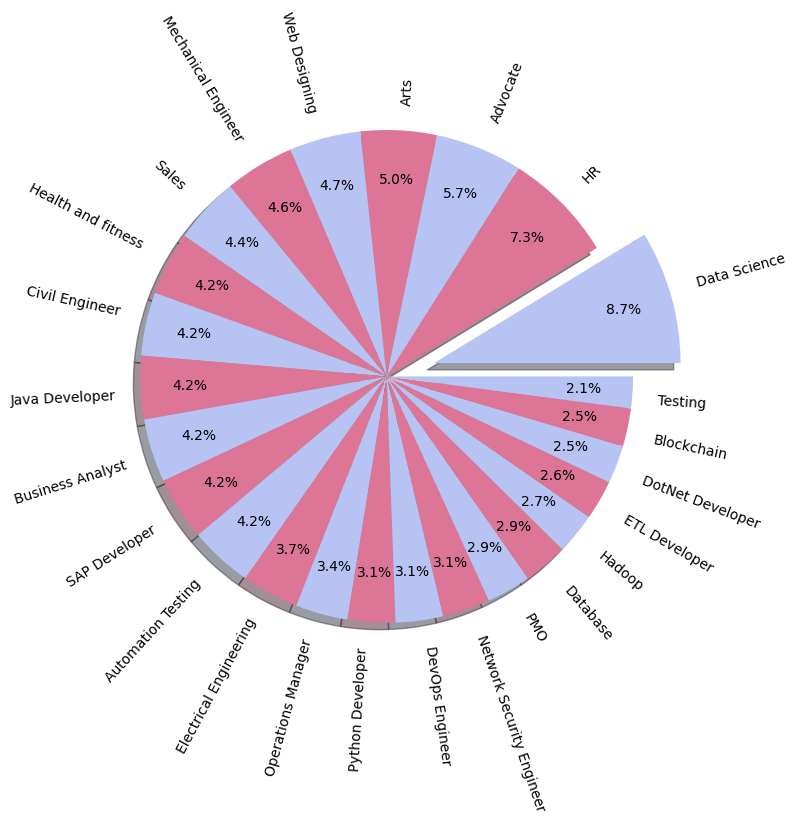

In [8]:
plt.figure(figsize=(8,8))
count = df['Category'].value_counts()
labels = df['Category'].unique()
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(count, labels=labels, explode = explode, shadow = True, autopct = '%1.1f%%', pctdistance=0.8, rotatelabels = True, colors=['#B7C3F3','#DD7596'])
plt.show()

In [9]:
df['Resume'][3]

"Skills â\x80¢ R â\x80¢ Python â\x80¢ SAP HANA â\x80¢ Tableau â\x80¢ SAP HANA SQL â\x80¢ SAP HANA PAL â\x80¢ MS SQL â\x80¢ SAP Lumira â\x80¢ C# â\x80¢ Linear Programming â\x80¢ Data Modelling â\x80¢ Advance Analytics â\x80¢ SCM Analytics â\x80¢ Retail Analytics â\x80¢Social Media Analytics â\x80¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 months\r\nSQL- Exprience - Less than 1 year months\r\nDeep Learning- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year mo

## **2. Feature Engineering**

#### **2.1 Textual Data Preprocessing**

1. Remove URL, emails, RT | CC
2. Remove punctuaitons
3. Remove hashtags

In [10]:
def textprep(txt):
  cleantext = re.sub('http\S+\s', '', txt)
  cleantext = re.sub('#\S+\s', '', cleantext)
  cleantext = re.sub('RT|cc', '', cleantext)
  cleantext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleantext)
  cleantext = re.sub(r'[^\x00-\x7f]', ' ', cleantext)
  cleantext = re.sub('\d+', ' ', cleantext)
  cleantext = re.sub('\s+', ' ', cleantext)
  return cleantext


In [11]:
df['Resume'] = df['Resume'].apply(textprep)

In [12]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience months jQuery Exprience months Python Exprience monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in aelerating the review proces

In [13]:
# def remove_stopwords(txt):
#   cleantext = [word.lower() for word in txt.split() if word.lower() not in stop_words]
#   return " ".join(cleantext)

# def remove_stopwords_new(txt):
#     if isinstance(txt, str):  # Ensure the input is a string
#         cleantext = [word.lower() for word in txt.split() if word.lower() not in stop_words]
#         return " ".join(cleantext)
#     else:
#         return ""

# df['Resume'] = df['Resume'].apply(remove_stopwords)
# df['Resume'] = df['Resume'].apply(remove_stopwords_new)

#### **2.2 Converting words into categorical values**

In [14]:
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

#### **2.3 Vectorisation**

In [15]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
vectorised_text  = tfidf.transform(df['Resume'])


In [16]:
df['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

#### **2.4 Train test split**

In [17]:
X = vectorised_text
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state= 42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(769, 7049)
(193, 7049)
(769,)
(193,)


## **3. Machine Learning**

In [19]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [20]:
y_pred = clf.predict(X_test)


In [21]:
accuracy_score(y_test, y_pred)

0.9844559585492227

## **4. Prediction**

In [22]:
# Creating the pickle in google drive
vector_drive_path = '/content/drive/MyDrive/Pickle files/resume screening app/tfidf.pkl'
model_drive_path = '/content/drive/MyDrive/Pickle files/resume screening app/clf.pkl'

In [23]:
# storing the tfidf and ml model in pickle
with open(vector_drive_path, 'wb') as file:
    pickle.dump(tfidf, file)

with open(model_drive_path, 'wb') as file:
    pickle.dump(clf, file)

In [24]:
# Sample resume for testing pickle
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""


In [25]:
with open(model_drive_path, 'rb') as file:
    model = pickle.load(file)
with open(vector_drive_path, 'rb') as file:
    vector = pickle.load(file)
cleaned_resume = textprep(myresume)
vectorised_input = vector.transform([cleaned_resume])
prediction_id = model.predict(vectorised_input)[0]
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
